## MNIST + PCA
---  
- Feature 784개 > 주요 Feature로 압축

In [1]:
from sklearn.datasets import fetch_openml
from sklearn.decomposition import PCA
from tensorflow.keras.datasets.mnist import load_data
import numpy as np
import matplotlib.pyplot as plt

### [1] 데이터 로딩

In [2]:
(X_train, y_train), (x_test, y_test) = load_data()

### [2] MNIST의 PC 수 찾기
---  

In [57]:
list_trust = [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 0.95, 0.99]
list_X_recoverd = []


X_train = X_train.reshape(-1, 28 * 28)

for i in range(0, len(list_trust)) : 
    num = list_trust[i]
    pca = PCA(n_components=num)
    X_reduced = pca.fit_transform(X_train) 
    X_recovered = pca.inverse_transform(X_reduced)
    X_recovered = X_recovered.reshape(-1, 28, 28, 1)
    list_X_recoverd.append(X_recovered)

In [72]:
X_train = X_train.reshape(-1, 28, 28, 1)

def showImg(num) :

    plt.figure(figsize=(24,13))
    plt.subplot(3, 4, 1)
    plt.imshow(X_train[num], cmap='gray')
    plt.title("Original")
    
    for i in range(0, len(list_trust)) :
        plt.subplot(3, 4, i+2)
        plt.imshow(list_X_recoverd[i][num], cmap='gray')
        plt.title(f"{list_trust[i]* 100}%")
    
    plt.show()

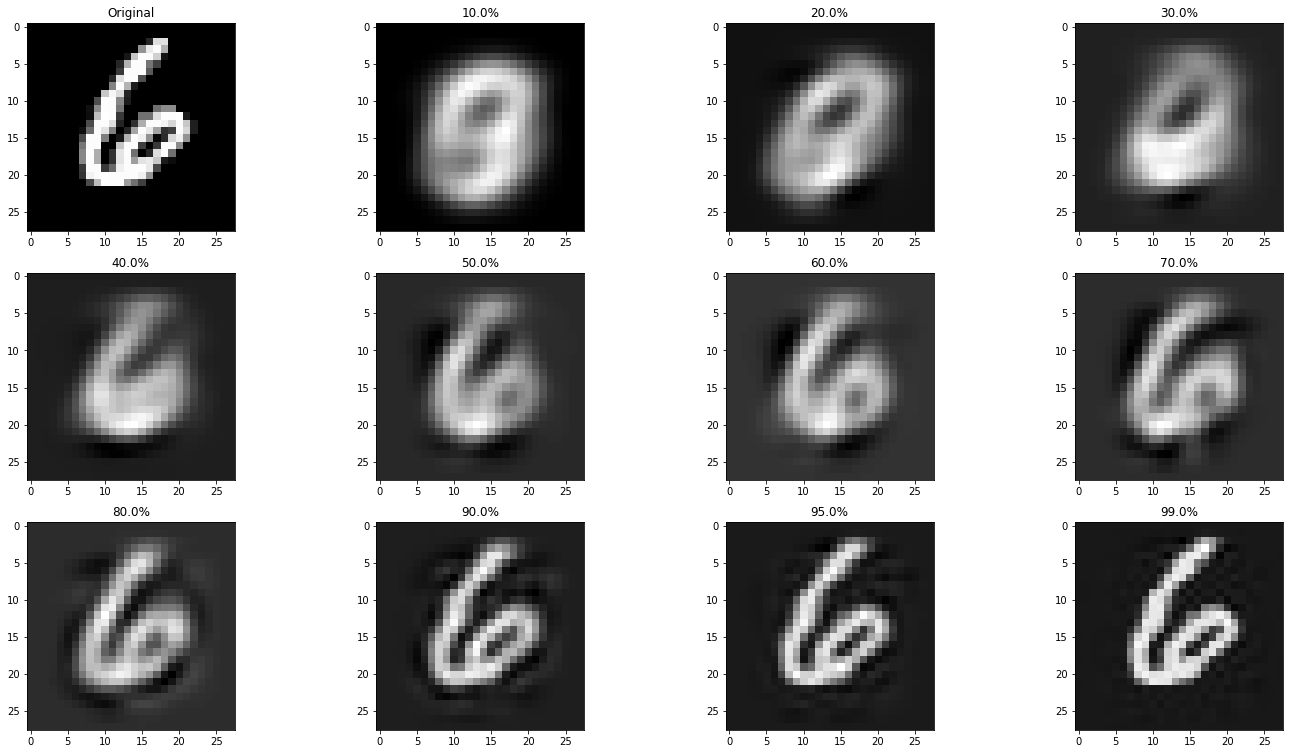

In [74]:
showImg(13)